In [1]:
from dateutil import parser
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
h = {}
h["date"] = []
h["true"] = []
h["total"] = []


with open("hillary_stats.txt", "r") as f:
    for i, line in enumerate(f):
        if i > 0:
            date, true, total = line.split("\t")
            h["date"].append(parser.parse(date))
            h["true"].append(int(true))
            h["total"].append(int(total.rstrip()))


In [3]:
m = {}
m["date"] = []
m["true"] = []
m["total"] = []


with open("may_stats.txt", "r") as f:
    for i, line in enumerate(f):
        if i > 0:
            date, true, total = line.split("\t")
            m["date"].append(parser.parse(date))
            m["true"].append(int(true))
            m["total"].append(int(total.rstrip()))


In [4]:
t = {}
t["date"] = []
t["true"] = []
t["total"] = []


with open("trump_stats.txt", "r") as f:
    for i, line in enumerate(f):
        if i > 0:
            date, true, total = line.split("\t")
            t["date"].append(parser.parse(date))
            t["true"].append(int(true))
            t["total"].append(int(total.rstrip()))


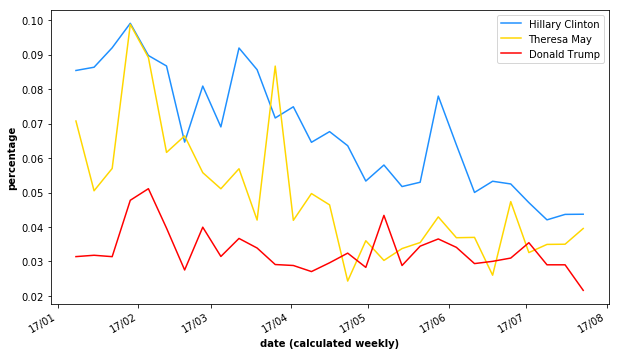

In [5]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m'))
plt.plot(h["date"], [h["true"][i]/h["total"][i] for i in range(len(h["total"]))], color="dodgerblue")
plt.plot(m["date"], [m["true"][i]/m["total"][i] for i in range(len(m["total"]))], color="gold")
plt.plot(t["date"], [t["true"][i]/t["total"][i] for i in range(len(t["total"]))], color="red")

plt.gcf().autofmt_xdate()

plt.xlabel('date (calculated weekly)', fontweight='bold')
plt.ylabel('percentage', fontweight='bold')
plt.legend(["Hillary Clinton", "Theresa May", "Donald Trump"], loc='upper right')

plt.gcf().set_size_inches(10, 6)    
plt.show()

In [6]:
def plot_bar(data, color, name):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m'))

    none = [data["total"][i] - data["true"][i] for i in range(len(data["total"]))]

    p1 = plt.bar(data["date"], none, width=5, color='grey')
    p2 = plt.bar(data["date"], data["true"], width=5, color=color,
                 bottom=none)


    plt.gcf().autofmt_xdate()

    plt.title('Number of normal and abusive tweets crawled - %s' % name, fontweight='bold')

    plt.xlabel('date (calculated weekly)', fontweight='bold')
    plt.ylabel('number of tweets', fontweight='bold')
    plt.legend(["Normal", "Abusive"], loc='upper right')

    plt.gcf().set_size_inches(10, 6)    
    plt.show()

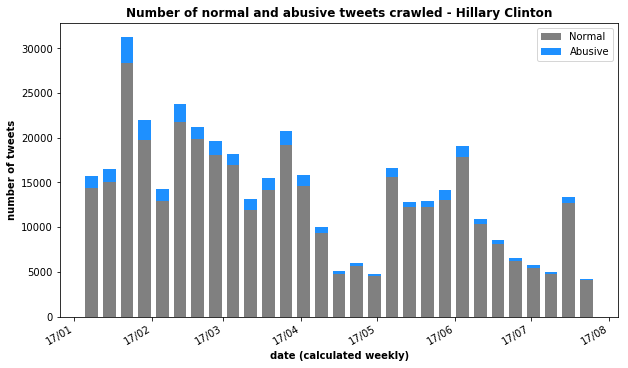

In [7]:
plot_bar(h, "dodgerblue", "Hillary Clinton")

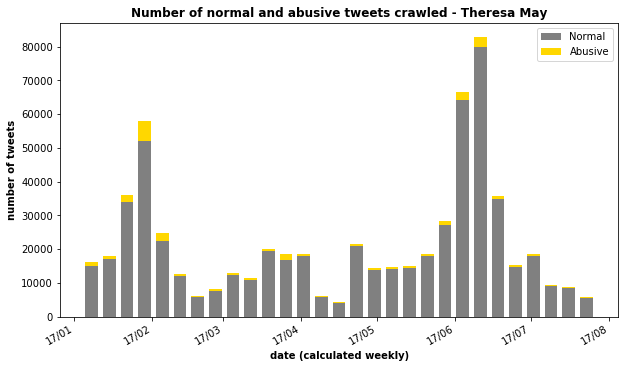

In [8]:
plot_bar(m, "gold", "Theresa May")

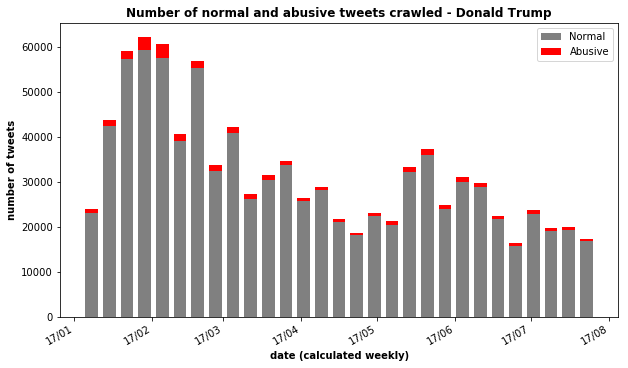

In [9]:
plot_bar(t, "red", "Donald Trump")